<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/AutoGluon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
def eval(yact,ypred):
 from sklearn import metrics
 print("Accuracy:",metrics.accuracy_score(yact, ypred))
 print("Precision:",metrics.precision_score(yact, ypred))
 print("Recall:",metrics.recall_score(yact, ypred))

 cnf_matrix = metrics.confusion_matrix(yact, ypred)
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline
 class_names=[0,1] # name  of classes
 fig, ax = plt.subplots()
 tick_marks = np.arange(len(class_names))
 plt.xticks(tick_marks, class_names)
 plt.yticks(tick_marks, class_names)
 # create heatmap
 sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
 ax.xaxis.set_label_position("top")
 plt.tight_layout()
 plt.title('Confusion matrix', y=1.1)
 plt.ylabel('Actual label')
 plt.xlabel('Predicted label')

In [3]:
!pip install autogluon.tabular

In [2]:
#Do not forget to restart runtime
import pandas as pd
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor
df=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/healthcare-dataset-stroke-data.csv')

In [4]:
df_train,df_test=train_test_split(df,test_size=0.33,random_state=1)
df_train.shape,df_test.shape

((3423, 12), (1687, 12))

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [18]:
y_test=df_test['stroke']
test_data=df_test.drop(['stroke'],axis=1)
test_data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4673,49833,Female,42.0,0,0,Yes,Govt_job,Rural,112.98,37.2,formerly smoked
3232,20375,Female,78.0,0,0,Yes,Private,Urban,78.29,30.1,formerly smoked
3694,39834,Male,28.0,0,0,No,Private,Urban,73.27,25.4,smokes
1070,42550,Female,81.0,0,0,Yes,Self-employed,Rural,246.34,21.1,never smoked
4163,19907,Female,52.0,0,0,Yes,Private,Rural,97.05,28.0,Unknown


In [22]:
predictor= TabularPredictor(label ='stroke').fit(train_data = df_train, verbosity = 2)

No path specified. Models will be saved in: "AutogluonModels/ag-20240314_000047"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240314_000047"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
C

In [23]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2      0.962    accuracy       0.040480  3.108332                0.001965           1.000329            2       True         13
1         LightGBMLarge      0.960    accuracy       0.010844  1.286385                0.010844           1.286385            1       True         12
2            LightGBMXT      0.960    accuracy       0.013211  1.010725                0.013211           1.010725            1       True          3
3               XGBoost      0.960    accuracy       0.025305  1.097279                0.025305           1.097279            1       True         10
4      RandomForestGini      0.956    accuracy       0.082472  2.659546                0.082472           2.659546            1       True          5
5      RandomForestEntr      0.956    

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestGini': 'RFModel',
  'RandomForestEntr': 'RFModel',
  'ExtraTreesGini': 'XTModel',
  'ExtraTreesEntr': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': 0.954,
  'KNeighborsDist': 0.948,
  'LightGBMXT': 0.96,
  'LightGBM': 0.954,
  'RandomForestGini': 0.956,
  'RandomForestEntr': 0.956,
  'ExtraTreesGini': 0.954,
  'ExtraTreesEntr': 0.954,
  'NeuralNetFastAI': 0.954,
  'XGBoost': 0.96,
  'NeuralNetTorch': 0.954,
  'LightGBMLarge': 0.96,
  'WeightedEnsemble_L2': 0.962},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': ['KNeighborsUnif'],
  'KNeighborsDist': ['KNeighborsDist'],
  'LightGBMXT': ['LightGBMXT'],
  'Lig

In [24]:
predictor.leaderboard(df_train, silent=True)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMLarge,0.994157,0.960,accuracy,0.051024,0.010844,1.286385,0.051024,0.010844,1.286385,1,True,12
1,RandomForestEntr,0.993573,0.956,accuracy,0.138820,0.104634,2.713460,0.138820,0.104634,2.713460,1,True,6
2,RandomForestGini,0.993573,0.956,accuracy,0.148843,0.082472,2.659546,0.148843,0.082472,2.659546,1,True,5
3,ExtraTreesGini,0.993281,0.954,accuracy,0.151728,0.124389,2.204944,0.151728,0.124389,2.204944,1,True,7
4,ExtraTreesEntr,0.993281,0.954,accuracy,0.154188,0.116092,1.780650,0.154188,0.116092,1.780650,1,True,8
5,KNeighborsDist,0.992404,0.948,accuracy,0.015905,0.019275,0.014719,0.015905,0.019275,0.014719,1,True,2
6,XGBoost,0.992112,0.960,accuracy,0.057522,0.025305,1.097279,0.057522,0.025305,1.097279,1,True,10
7,WeightedEnsemble_L2,0.983932,0.962,accuracy,0.123781,0.040480,3.108332,0.003142,0.001965,1.000329,2,True,13
8,LightGBMXT,0.976921,0.960,accuracy,0.063117,0.013211,1.010725,0.063117,0.013211,1.010725,1,True,3
9,NeuralNetFastAI,0.959392,0.954,accuracy,0.082967,0.029838,8.581119,0.082967,0.029838,8.581119,1,True,9


In [25]:
predictor.feature_importance(data=df_train)

Computing feature importance via permutation shuffling for 11 features using 3423 rows with 5 shuffle sets...
	8.79s	= Expected runtime (1.76s per shuffle set)
	6.98s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
age,0.030207,0.001944,2.048854e-06,5,0.034211,0.026204
bmi,0.026760,0.000867,1.318128e-07,5,0.028545,0.024976
id,0.018872,0.001889,1.188026e-05,5,0.022761,0.014983
avg_glucose_level,0.018230,0.000704,2.657277e-07,5,0.019678,0.016781
work_type,0.007596,0.000876,2.089790e-05,5,0.009400,0.005791
gender,0.006661,0.000811,2.581633e-05,5,0.008330,0.004992
heart_disease,0.005843,0.000413,2.980104e-06,5,0.006694,0.004992
Residence_type,0.005551,0.001323,3.593246e-04,5,0.008274,0.002827
smoking_status,0.004850,0.001045,2.436344e-04,5,0.007002,0.002697
hypertension,0.004324,0.000381,7.154040e-06,5,0.005108,0.003539


In [26]:
y_pred = predictor.predict(test_data)
y_pred=pd.DataFrame(y_pred,columns=['stroke'])
y_pred #print the DataFrame

,stroke
4673,0
3232,0
3694,0
1070,0
4163,0
...,...
386,0
3961,0
1608,0
1459,0


Accuracy: 0.940130409010077
Precision: 0.13333333333333333
Recall: 0.022222222222222223


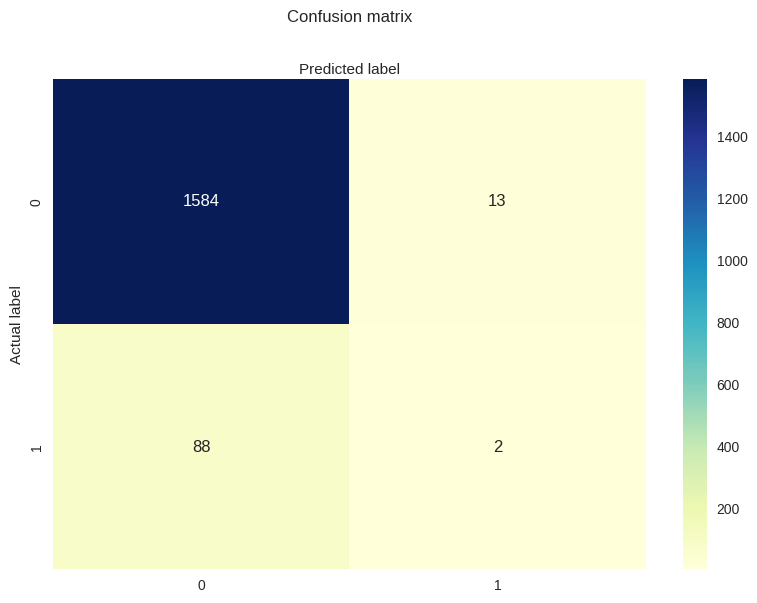

In [27]:
eval(y_test,y_pred)

In [28]:
predictor.evaluate(df_test)

{'accuracy': 0.940130409010077,
 'balanced_accuracy': 0.5070409796145551,
 'mcc': 0.0337111081838141,
 'roc_auc': 0.7990120364572462,
 'f1': 0.0380952380952381,
 'precision': 0.13333333333333333,
 'recall': 0.022222222222222223}

In [ ]:
!pip install pycaret

In [29]:
from pycaret.classification import *
s = setup(data = df_train, target = 'stroke', session_id=123,fold=5)

,Description,Value
0,Session id,123
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(3423, 12)"
4,Transformed data shape,"(3423, 19)"
5,Transformed train set shape,"(2396, 19)"
6,Transformed test set shape,"(1027, 19)"
7,Numeric features,6
8,Categorical features,5
9,Rows with missing values,4.0%


In [40]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9537,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1960
rf,Random Forest Classifier,0.9537,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.1100
dummy,Dummy Classifier,0.9537,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2480
lr,Logistic Regression,0.9533,0.0000,0.0000,0.0000,0.0000,-0.0008,-0.0021,0.6180
knn,K Neighbors Classifier,0.9533,0.0000,0.0000,0.0000,0.0000,-0.0008,-0.0020,0.4700
et,Extra Trees Classifier,0.9533,0.0000,0.0273,0.4000,0.0507,0.0456,0.0938,0.5640
svm,SVM - Linear Kernel,0.9528,0.0000,0.0000,0.0000,0.0000,-0.0016,-0.0041,0.1680
lightgbm,Light Gradient Boosting Machine,0.9512,0.0000,0.0719,0.3200,0.1170,0.1037,0.1348,1.1320
xgboost,Extreme Gradient Boosting,0.9508,0.0000,0.1261,0.4022,0.1880,0.1702,0.2025,0.5040
ada,Ada Boost Classifier,0.9499,0.0000,0.0455,0.2500,0.0760,0.0635,0.0889,0.4980


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [43]:

xg = create_model('qda')
tuned2 = tune_model(xg)
tuned_predictions = predict_model(tuned2, data=test_data)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8792,0.0000,0.0435,0.0270,0.0333,-0.0274,-0.0283
1,0.3967,0.0000,0.7727,0.0565,0.1053,0.0215,0.0655
2,0.8038,0.0000,0.2273,0.0610,0.0962,0.0256,0.0327
3,0.4092,0.0000,0.5909,0.0453,0.0841,-0.0013,-0.0037
4,0.6472,0.0000,0.7273,0.0894,0.1592,0.0843,0.1604
Mean,0.6272,0.0000,0.4723,0.0558,0.0956,0.0205,0.0453
Std,0.1979,0.0000,0.2875,0.0205,0.0404,0.0371,0.0658


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9312,0.0000,0.2609,0.2727,0.2667,0.2306,0.2307
1,0.9332,0.0000,0.2273,0.2500,0.2381,0.2032,0.2035
2,0.9269,0.0000,0.3182,0.2593,0.2857,0.2476,0.2491
3,0.9374,0.0000,0.2273,0.2778,0.2500,0.2177,0.2189
4,0.9353,0.0000,0.2273,0.2632,0.2439,0.2103,0.2109
Mean,0.9328,0.0000,0.2522,0.2646,0.2569,0.2219,0.2226
Std,0.0036,0.0000,0.0355,0.0098,0.0173,0.0157,0.0160


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Accuracy: 0.916419679905157
Precision: 0.21348314606741572
Recall: 0.2111111111111111


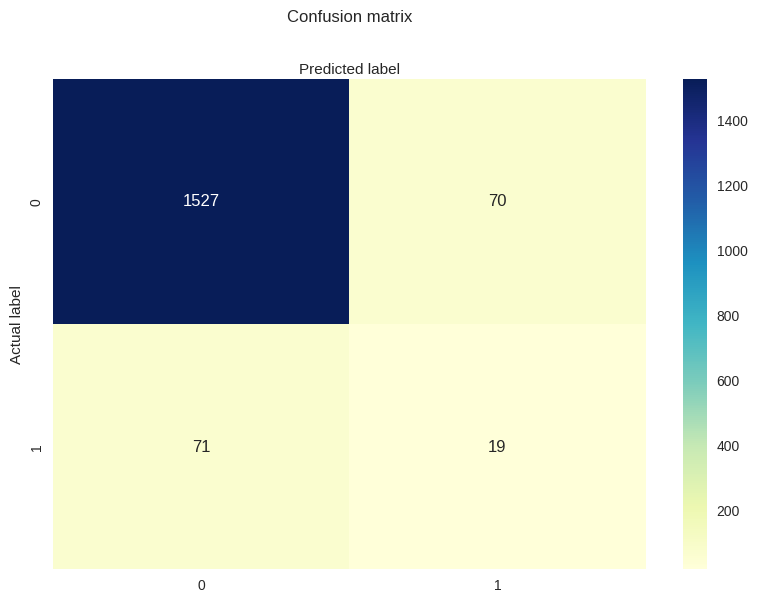

In [44]:
eval(y_test,tuned_predictions['prediction_label'])

Reference:

https://www.analyticsvidhya.com/blog/2021/10/beginners-guide-to-automl-with-an-easy-autogluon-example/